In [1]:
import os
import pandas as pd
import numpy as np

##tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN, LSTM, Dropout, BatchNormalization
from tensorflow.keras.layers import Bidirectional,LayerNormalization

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint


## text preprocessing modules
from gensim.parsing.preprocessing import remove_stopwords
from gensim.models import Word2Vec
import re
import nltk
nltk.download('punkt')
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score,auc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, BatchNormalization, Dropout, Embedding, LayerNormalization, Bidirectional



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv('Sentiment_news_dataframe.csv')
df.head()

,Date,Title,URL,sentiment,confidence,Unnamed: 5
0,03/10/17,Amber Enterprises files for Rs555 crore IPO,http://www.livemint.com/Money/DJCTYXYzpDnVT1Ki...,NEGATIVE,-0.987213,NaN
1,21/04/18,No need to divorce this stock ; brokerage sees...,https://www.moneycontrol.com/news/business/sto...,POSITIVE,0.946583,NaN
2,11/07/18,An evening walk down Dalal Street : Trade war ...,https://www.moneycontrol.com/news/business/mar...,POSITIVE,0.967994,NaN
3,09/01/20,Commodity outlook : Refined soya oil jumps 8 %...,https://economictimes.indiatimes.com/markets/c...,NEGATIVE,-0.879617,NaN
4,19/04/17,Nikkei : Tokyo stocks open lower after British...,http://economictimes.indiatimes.com/markets/st...,NEGATIVE,-0.941918,NaN


# Preprocessing

Dropping Columns not required

In [3]:
df = df.drop(['Date','URL','confidence','Unnamed: 5'], axis=1)
df.head()

,Title,sentiment
0,Amber Enterprises files for Rs555 crore IPO,NEGATIVE
1,No need to divorce this stock ; brokerage sees...,POSITIVE
2,An evening walk down Dalal Street : Trade war ...,POSITIVE
3,Commodity outlook : Refined soya oil jumps 8 %...,NEGATIVE
4,Nikkei : Tokyo stocks open lower after British...,NEGATIVE


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Title      60000 non-null  object
 1   sentiment  60000 non-null  object
dtypes: object(2)
memory usage: 937.6+ KB


Check for null values

In [5]:
df.isnull().sum()


Title        0
sentiment    0
dtype: int64

Drop Duplicates

In [6]:
df = df.drop_duplicates(subset=["Title"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59973 entries, 0 to 59999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Title      59973 non-null  object
 1   sentiment  59973 non-null  object
dtypes: object(2)
memory usage: 1.4+ MB


In [7]:
headline= list(df['Title'])
headline[0:2]

['Amber Enterprises files for Rs555 crore IPO',
 'No need to divorce this stock ; brokerage sees up to 26 % upside on this wedding portal']

In [8]:
### Basic text preprocessing where we remove special characters, any tags etc
#### Removal of stopwords
#### Removal of tags
#### Removal of special characters
#### Removal of email id
#### Removal of numbers
text=[]
for r in headline:
  r = re.sub(r'<.*?>',"",r)
  r = re.sub(r'\S+@\S+\s','',r)
  r = re.sub(r'\d+','',r)
  r = re.sub(r'[#$!\*\)\(\\%:;,\'_-]','',r)
  text.append(remove_stopwords(r))

text[0:3]

['Amber Enterprises files Rs crore IPO',
 'No need divorce stock brokerage sees upside wedding portal',
 'An evening walk Dalal Street Trade war fears grips equity markets globe Nifty ends']

# Tokenisation

In [9]:
### Now the reviews are faily clean, we will tokenize the reviews and get word embeddings for these
tokenizer=Tokenizer(num_words=15000,lower=True,oov_token='UNK')# out of vocabulory-oov

Train test split

In [10]:
## Before applying the tokenizer, lets split the data into train test
train_text=text[:len(text)-6000]
test_text=text[-6000:]
print(len(text),len(train_text),len(test_text))

59973 53973 6000


In [11]:
### Now lets tokenize the reviews
tokenizer.fit_on_texts(train_text)

In [12]:
tokenizer.word_index

{'UNK': 1,
 'india': 2,
 'market': 3,
 'rs': 4,
 'us': 5,
 'stocks': 6,
 'says': 7,
 'sensex': 8,
 'nifty': 9,
 'the': 10,
 'bank': 11,
 'growth': 12,
 'rbi': 13,
 'china': 14,
 'economy': 15,
 'trade': 16,
 'indian': 17,
 'live': 18,
 'new': 19,
 'budget': 20,
 'markets': 21,
 'modi': 22,
 'global': 23,
 'news': 24,
 'crore': 25,
 'gold': 26,
 'financial': 27,
 'oil': 28,
 'stock': 29,
 'price': 30,
 'rupee': 31,
 'trump': 32,
 'prices': 33,
 'economic': 34,
 'covid': 35,
 'govt': 36,
 'buy': 37,
 'today': 38,
 'dollar': 39,
 'q': 40,
 'sebi': 41,
 'rate': 42,
 'year': 43,
 'share': 44,
 'express': 45,
 'coronavirus': 46,
 'how': 47,
 'high': 48,
 'fund': 49,
 'report': 50,
 'pm': 51,
 'business': 52,
 'policy': 53,
 'investors': 54,
 'tax': 55,
 'government': 56,
 'day': 57,
 'shares': 58,
 'week': 59,
 'mutual': 60,
 'street': 61,
 'world': 62,
 'funds': 63,
 'gst': 64,
 'fy': 65,
 'time': 66,
 'likely': 67,
 'gdp': 68,
 'investment': 69,
 'ahead': 70,
 'higher': 71,
 'points': 72,


In [13]:
len(tokenizer.word_index)

26758

# Glove Embeddings

In [14]:
embeddings_index= dict()
glove= open('glove.6B.100d.txt','r',encoding='utf-8') 
for line in glove:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs

glove.close()

In [15]:
len(embeddings_index)

400000

In [16]:
### Create an embedding matrix for the vocabulary   
vocab= len(tokenizer.word_index)+1   #determines the length of the vocabulary by adding one to the maximum index of the tokenizer's word index
embedding_matrix = np.zeros((vocab, 100)) #initializes an embedding matrix where vocab is the length of the vocabulary and 100 is the dimensionality of the pre-trained word embeddings 
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector 
        #iterates over each word in the tokenizer's word index and retrieves the pre-trained embedding vector 
        #for that word from a pre-trained embedding index (GloVe). If the embedding vector is found, it is assigned to the corresponding row in the 
        #embedding matrix (i.e., the ith row, where i is the index of the word in the tokenizer's word index). 
        #If the embedding vector is not found, the corresponding row in the embedding matrix is left as a row of zeros.



In [17]:
embedding_matrix.shape

(26759, 100)

In [18]:
train_indices=tokenizer.texts_to_sequences(train_text) #using a tokenizer to convert a list of text strings into a list of sequences of integers.

In [19]:
train_indices[0:5]

[[4649, 1317, 988, 4, 25, 77],
 [296, 125, 7090, 29, 4650, 190, 1061, 4035, 3714],
 [667, 678, 623, 397, 61, 16, 153, 374, 6491, 155, 21, 3715, 9, 298],
 [515, 137, 8824, 7833, 28, 341, 16, 38],
 [1537, 4232, 6, 124, 123, 1563, 2672, 197, 24]]

# Pad Sequences

max_length=64
The pad_sequences() function takes a list of sequences (in this case, train_indices) as input and pads or truncates the sequences to a fixed length. In this case, the maxlen parameter is set to 64, which means that all sequences will be padded or truncated to a length of 64.

If a sequence is shorter than 64 elements, it will be padded with zeros at the end (since padding='post'). If a sequence is longer than 64 elements, it will be truncated to the first 64 elements.

After the padding is applied, the resulting sequences are stored back into the train_indices variable.

The reason for doing this padding is that neural networks usually require inputs to have a fixed size. In this case, all input sequences are of the same length (64), which makes it possible to use them as input to a neural network model.

Without the padding, the sequences might have different lengths, which would make it difficult to use them as input features for a neural network.





In [20]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_length=64
train_indices=pad_sequences(train_indices,maxlen=max_length,padding='post')

In [21]:
df['sentiment'].value_counts()

NEGATIVE    29988
POSITIVE    29985
Name: sentiment, dtype: int64

In [22]:
#replace() method is used to replace the string values "POSITIVE" and "NEGATIVE" in the sentiment column with the integer 
#values 1 and 0, respectively. 
df['sentiment'].replace(['POSITIVE','NEGATIVE'],[1,0],inplace=True)
df['sentiment'].value_counts() 
#value_counts() method is used to count the number of occurrences of each unique value in the sentiment column.


0    29988
1    29985
Name: sentiment, dtype: int64

In [23]:
Y=list(df['sentiment'])
train_y=Y[:len(Y)-6000]
test_y=Y[-6000:]
print(len(train_y),len(test_y))

53973 6000


In [24]:
train_indices=np.asarray(train_indices)
train_y=np.asarray(train_y)

In [25]:
test_indices=tokenizer.texts_to_sequences(test_text)
test_indices=pad_sequences(test_indices,maxlen=max_length,padding='post')
test_indices=np.asarray(test_indices)
test_y=np.asarray(test_y)

# Sequential Models

Sequential() is a class in the Keras API for building a sequential model in deep learning. The model is a linear stack of layers where each layer is connected to the next layer, forming a sequence of layers.

The Sequential() function initializes an empty sequential model object that can be used to add layers one after the other. Once we have created the model using Sequential(), we can add layers to the model using the add() method.

# SimpleRNN

In [35]:
# defining a sequential neural network model using the Keras API
vocab= len(tokenizer.word_index)+1 #calculates the vocabulary size of the input data 
modelRNN= Sequential()
modelRNN.add(Embedding(input_dim=vocab,output_dim=100,input_length=max_length)) #input sequences of integers as input and converts them into dense vectors of fixed size
modelRNN.add(Dropout(0.3))# dropping at input level to prevent overfitting
modelRNN.add(SimpleRNN(32))#SimpleRNN layer has 32 units, which determines the dimensionality of the internal state.
modelRNN.add(Dropout(0.3))# another drop out layer added after RNN to prevent overfitting
modelRNN.add(Dense(1, activation='sigmoid'))#fully connected layer that produces a single output value between 0 and 1 with use of sigmoid function
modelRNN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#compile() method is used to compile the model, specifying the loss function ('binary_crossentropy'), the optimizer ('adam'),
# and the evaluation metric ('accuracy').

print(modelRNN.summary())# print a summary of the model architecture


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 64, 100)           2675900   
                                                                 
 dropout_6 (Dropout)         (None, 64, 100)           0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                4256      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,680,189
Trainable params: 2,680,189
Non-trainable params: 0
_________________________________________________________________
None


*train_indices is the input data for the model, typically a set of training examples that have been converted into numerical features.

*train_y is the output data for the model, which typically consists of labels or target values that the model is trying to predict.

*epochs specifies the number of times the model will iterate over the entire training dataset during training. Each iteration over the dataset is called an epoch.

*batch_size specifies the number of training examples that the model will use at once to update its parameters during each epoch. The model will use mini-batch stochastic gradient descent to optimize the parameters.

*validation_split specifies the proportion of the training data that will be used for validation during training. In this case, 20% of the training data will be used for validation, and the remaining 80% will be used for actual training.


In [36]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = modelRNN.fit(train_indices, train_y, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
test_loss, test_acc = modelRNN.evaluate(test_indices, test_y)

# Make predictions
test_pred = modelRNN.predict(test_indices)
test_pred_classes = [1 if p > 0.5 else 0 for p in test_pred]

# Calculate accuracy, precision, recall, and F1 score
train_pred = modelRNN.predict(train_indices)
train_pred_classes = [1 if p > 0.5 else 0 for p in train_pred]

train_acc = accuracy_score(train_y, train_pred_classes)
test_acc = accuracy_score(test_y, test_pred_classes)

precision = precision_score(test_y, test_pred_classes)
recall = recall_score(test_y, test_pred_classes)
f1 = f1_score(test_y, test_pred_classes)

# Generate classification report
print("SimpleRNN classification_report:\n",classification_report(test_y, test_pred_classes))

# Calculate AUC
fpr, tpr, thresholds = roc_curve(test_y, test_pred)
auc_score = auc(fpr, tpr)

# Print the results
print('Train Accuracy of SimpleRNN:', train_acc)
print('Test Accuracy of SimpleRNN:', test_acc)
print('Precision of SimpleRNN:', precision)
print('Recall of SimpleRNN:', recall)
print('F1 Score of SimpleRNN:', f1)
print('AUC Score:', auc_score)


Epoch 1/10
1350/1350 [==============================] - 50s 36ms/step - loss: 0.6310 - accuracy: 0.6567 - val_loss: 0.5707 - val_accuracy: 0.7231
Epoch 2/10
1350/1350 [==============================] - 47s 35ms/step - loss: 0.5675 - accuracy: 0.7236 - val_loss: 0.5698 - val_accuracy: 0.7206
Epoch 3/10
1350/1350 [==============================] - 52s 39ms/step - loss: 0.4927 - accuracy: 0.7789 - val_loss: 0.5716 - val_accuracy: 0.7255
Epoch 4/10
1350/1350 [==============================] - 67s 49ms/step - loss: 0.4465 - accuracy: 0.8054 - val_loss: 0.5786 - val_accuracy: 0.7155
Epoch 5/10
1350/1350 [==============================] - 80s 59ms/step - loss: 0.4105 - accuracy: 0.8240 - val_loss: 0.6201 - val_accuracy: 0.7182
Epoch 5: early stopping
1687/1687 [==============================] - 8s 4ms/step
SimpleRNN classification_report:
               precision    recall  f1-score   support

           0       0.73      0.72      0.72      3080
           1       0.71      0.71      0.71   

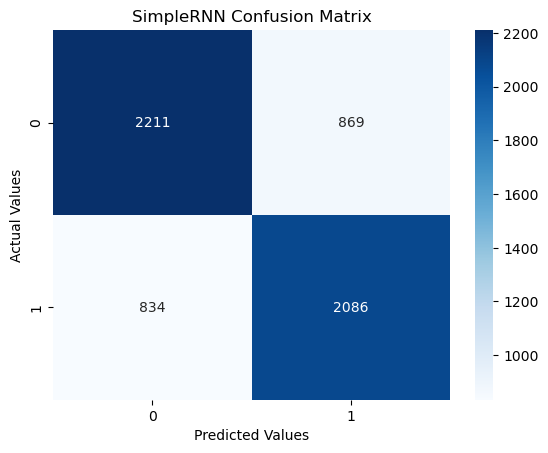

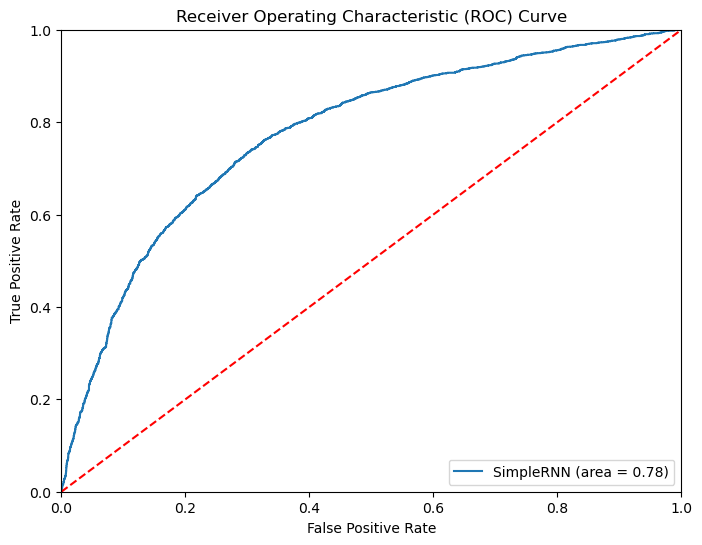

In [37]:
# Calculate confusion matrix
conf_mat = confusion_matrix(test_y, test_pred_classes)
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues')
plt.title('SimpleRNN Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='SimpleRNN (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# LSTM 

In [26]:
from tensorflow.keras.layers import ReLU

vocab = len(tokenizer.word_index) + 1
modelLSTM = Sequential()
modelLSTM.add(Embedding(input_dim=vocab, output_dim=100, input_length=max_length))
modelLSTM.add(Dropout(0.1))
modelLSTM.add(LSTM(32))
modelLSTM.add(Dropout(0.1))
modelLSTM.add(Dense(1))
modelLSTM.add(ReLU())
modelLSTM.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(modelLSTM.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 64, 100)           2675900   
                                                                 
 dropout (Dropout)           (None, 64, 100)           0         
                                                                 
 lstm (LSTM)                 (None, 32)                17024     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
 re_lu (ReLU)                (None, 1)                 0         
                                                                 
Total params: 2,692,957
Trainable params: 2,692,957
Non-

In [27]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = modelLSTM.fit(train_indices, train_y, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
test_loss, test_acc = modelLSTM.evaluate(test_indices, test_y)

# Make predictions
test_pred = modelLSTM.predict(test_indices)
test_pred_classes = [1 if p > 0.5 else 0 for p in test_pred]

# Calculate accuracy, precision, recall, and F1 score
train_pred = modelLSTM.predict(train_indices)
train_pred_classes = [1 if p > 0.5 else 0 for p in train_pred]

train_acc = accuracy_score(train_y, train_pred_classes)
test_acc = accuracy_score(test_y, test_pred_classes)

precision = precision_score(test_y, test_pred_classes)
recall = recall_score(test_y, test_pred_classes)
f1 = f1_score(test_y, test_pred_classes)

# Generate classification report
print(classification_report(test_y, test_pred_classes))

# Calculate AUC
fpr, tpr, thresholds = roc_curve(test_y, test_pred)
auc_score = auc(fpr, tpr)

# Print the results
print('Train Accuracy of LSTM model:', train_acc)
print('Test Accuracy of LSTM model:', test_acc)
print('Precision of LSTM model:', precision)
print('Recall of LSTM model:', recall)
print('F1 Score of LSTM model:', f1)
print('AUC Score of LSTM model:', auc_score)


Epoch 1/10
1350/1350 [==============================] - 104s 74ms/step - loss: 0.7016 - accuracy: 0.5023 - val_loss: 0.6931 - val_accuracy: 0.5066
Epoch 2/10
1350/1350 [==============================] - 98s 72ms/step - loss: 0.6970 - accuracy: 0.4983 - val_loss: 0.6931 - val_accuracy: 0.5066
Epoch 3/10
1350/1350 [==============================] - 101s 75ms/step - loss: 0.7005 - accuracy: 0.5273 - val_loss: 0.6333 - val_accuracy: 0.6602
Epoch 4/10
1350/1350 [==============================] - 110s 81ms/step - loss: 0.5663 - accuracy: 0.7252 - val_loss: 0.5458 - val_accuracy: 0.7278
Epoch 5/10
1350/1350 [==============================] - 113s 84ms/step - loss: 0.5375 - accuracy: 0.7366 - val_loss: 0.5427 - val_accuracy: 0.7364
Epoch 6/10
1350/1350 [==============================] - 111s 82ms/step - loss: 0.4362 - accuracy: 0.8219 - val_loss: 0.5376 - val_accuracy: 0.7381
Epoch 7/10
1350/1350 [==============================] - 99s 74ms/step - loss: 0.3868 - accuracy: 0.8518 - val_loss: 0.5

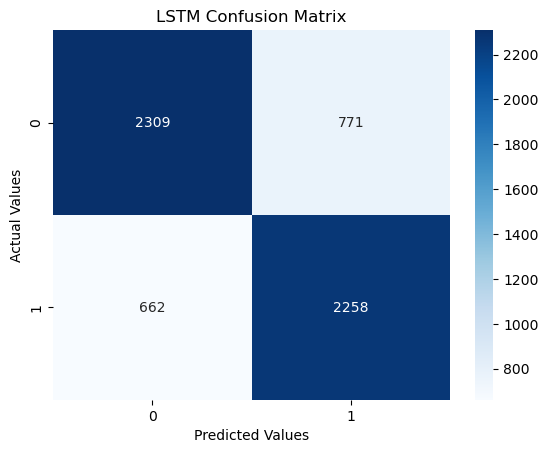

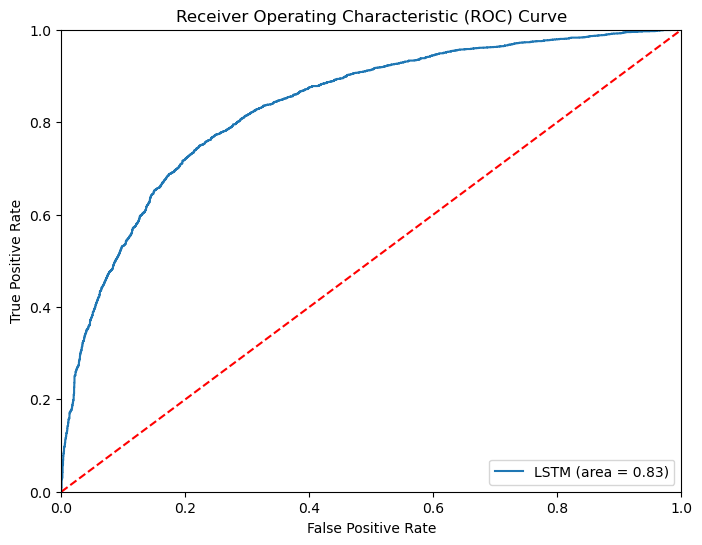

In [28]:
# Calculate confusion matrix
conf_mat = confusion_matrix(test_y, test_pred_classes)
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues')
plt.title('LSTM Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='LSTM (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#  Bidirectional RNN 

In [45]:
## Layer normalization is another regularization technique used to prevent overfitting by normalizing 
## the activations of the neurons in the layer

### Strengthening using bidirectional SimpleRNN

vocab= len(tokenizer.word_index)+1#calculates the vocabulary size of the input data 
modelbidr= Sequential()
modelbidr.add(Embedding(input_dim=vocab,output_dim=100,input_length=max_length))#input sequences of integers as input and converts them into dense vectors of fixed size
modelbidr.add(Dropout(0.3))# dropping at input level to prevent overfitting
modelbidr.add(Bidirectional(SimpleRNN(32)))#adds a Bidirectional SimpleRNN layer to the model.
modelbidr.add(LayerNormalization()) #dds a LayerNormalization layer to the model
modelbidr.add(Dropout(0.3))#adds another dropout layer after the layer Normalisation layer to further prevent overfitting
modelbidr.add(Dense(1, activation='sigmoid'))#fully connected layer that produces a single output value between 0 and 1 with use of sigmoid function
modelbidr.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(modelbidr.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 64, 100)           2675900   
                                                                 
 dropout_14 (Dropout)        (None, 64, 100)           0         
                                                                 
 bidirectional_5 (Bidirectio  (None, 64)               8512      
 nal)                                                            
                                                                 
 layer_normalization_3 (Laye  (None, 64)               128       
 rNormalization)                                                 
                                                                 
 dropout_15 (Dropout)        (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                

In [46]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history = modelbidr.fit(train_indices, train_y, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
test_loss, test_acc = modelbidr.evaluate(test_indices, test_y)

# Make predictions
test_pred = modelbidr.predict(test_indices)
test_pred_classes = [1 if p > 0.5 else 0 for p in test_pred]

# Calculate accuracy, precision, recall, and F1 score
train_pred = modelbidr.predict(train_indices)
train_pred_classes = [1 if p > 0.5 else 0 for p in train_pred]

train_acc = accuracy_score(train_y, train_pred_classes)
test_acc = accuracy_score(test_y, test_pred_classes)

precision = precision_score(test_y, test_pred_classes)
recall = recall_score(test_y, test_pred_classes)
f1 = f1_score(test_y, test_pred_classes)

# Generate classification report
print("Bidirectional RNN classification_report:\n",classification_report(test_y, test_pred_classes))

# Calculate AUC
fpr, tpr, thresholds = roc_curve(test_y, test_pred)
auc_score = auc(fpr, tpr)

# Print the results
print('Train Accuracy of Bidirectional RNN model:', train_acc)
print('Test Accuracy of Bidirectional RNN model:', test_acc)
print('Precision of Bidirectional RNN model:', precision)
print('Recall of Bidirectional RNN model:', recall)
print('F1 Score of Bidirectional RNN model:', f1)
print('AUC Score:', auc_score)



Epoch 1/10
1350/1350 [==============================] - 102s 73ms/step - loss: 0.6029 - accuracy: 0.6715 - val_loss: 0.5074 - val_accuracy: 0.7446
Epoch 2/10
1350/1350 [==============================] - 94s 70ms/step - loss: 0.4103 - accuracy: 0.8162 - val_loss: 0.5251 - val_accuracy: 0.7424
Epoch 3/10
1350/1350 [==============================] - 98s 73ms/step - loss: 0.2911 - accuracy: 0.8791 - val_loss: 0.6077 - val_accuracy: 0.7315
Epoch 4/10
1350/1350 [==============================] - 96s 71ms/step - loss: 0.2092 - accuracy: 0.9182 - val_loss: 0.6941 - val_accuracy: 0.7253
Epoch 4: early stopping
1687/1687 [==============================] - 13s 8ms/step
Bidirectional RNN classification_report:
               precision    recall  f1-score   support

           0       0.76      0.74      0.75      3080
           1       0.73      0.76      0.74      2920

    accuracy                           0.75      6000
   macro avg       0.75      0.75      0.75      6000
weighted avg       

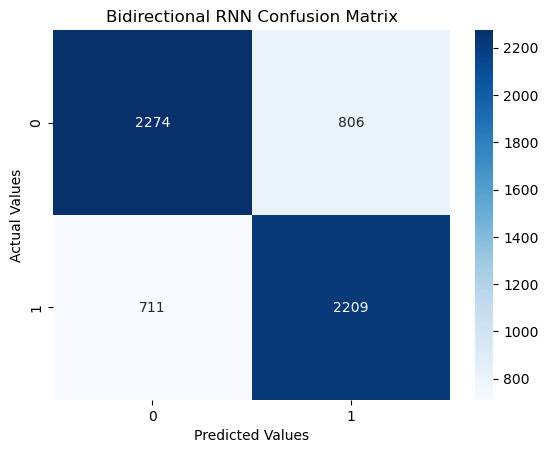

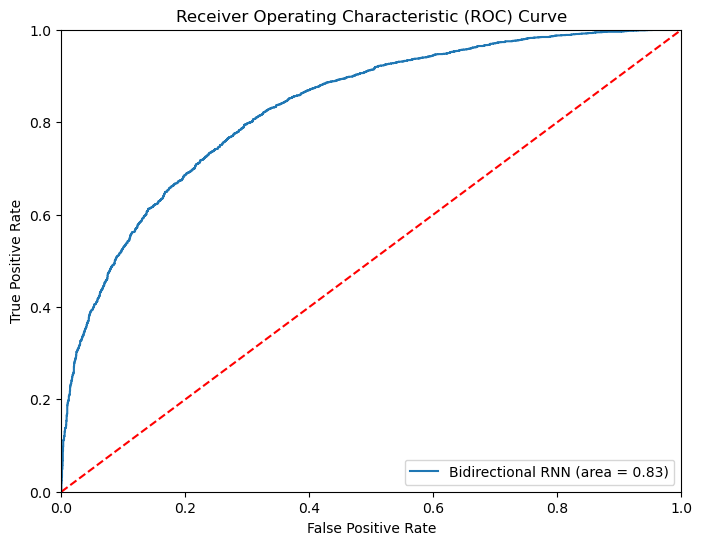

In [48]:
# Calculate confusion matrix
conf_mat = confusion_matrix(test_y, test_pred_classes)
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues')
plt.title('Bidirectional RNN Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='Bidirectional RNN (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()